<BR>  
<BR>  
<BR>  
<BR> 
<div style="text-align: center; line-height: 1.8; margin-top: 2in;">
  
**Evaluate and Contrast the Classification Techniques**

<br>
<br>

Gladys Murage

<br>

College of Business, Engineering, and Technology, National University

<br>

TIM-8131 v2: Data Mining (8221718749)

<br>

Dr. Yuksel Karahan

<br>

December 7, 2025

</div>
<BR>  
<BR>  
<BR>
<BR>
<BR>  
<BR>  
<BR>  
<BR>  

# Heart Disease Classification: Implementation Code
Below is the complete Python code for implementing and evaluating the three classification algorithms on the Heart Disease data set.
1. Logistic Regression
2. Random Forest
3. k-Nearest Neighbors

# Data Set Description
The Heart Disease Prediction Dataset from the UCI Machine Learning Repository is obtained from the source:  https://archive.ics.uci.edu/ml/datasets/heart+disease. The data set contains data from 303 patients, with 13 clinical attributes such as age, cholesterol levels, and chest pain type. The dataset is designed for binary classification tasks, aiming to predict the presence or absence of heart disease. Preprocessing steps include handling missing values and scaling numerical features to optimize performance for algorithms like k-NN.


In [1]:
# Load and Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')


# Set random seed for reproducibility
np.random.seed(42)

# 1. Data Loading and Exploration

   

In [2]:
print("=" * 70)
print("HEART DISEASE CLASSIFICATION ANALYSIS")
print("=" * 70)

# Load the dataset (UCI Heart Disease dataset)
# Dataset source: https://archive.ics.uci.edu/ml/datasets/heart+disease
# I will use the Cleveland dataset (processed.cleveland.data)

# Column names as per UCI documentation
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]


# Load the data from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
df = pd.read_csv(url, header=None, names=column_names)
print("Downloaded dataset from UCI repository")


print(f"\nDataset Shape: {df.shape}")
print(f"Features: {df.shape[1] - 1}")
print(f"Samples: {df.shape[0]}")

print("\nStep 0 — ORIGINAL missing values (all zero because '?' is not NaN):")
print(df.isnull().sum())


print("\nStep 1 — Count '?' before cleaning:")
print((df == '?').sum())


HEART DISEASE CLASSIFICATION ANALYSIS
Downloaded dataset from UCI repository

Dataset Shape: (303, 14)
Features: 13
Samples: 303

Step 0 — ORIGINAL missing values (all zero because '?' is not NaN):
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Step 1 — Count '?' before cleaning:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


# 2. Data Preprocessing

In [3]:

print("\n" + "=" * 70)
print("DATA PREPROCESSING")
print("=" * 70)


# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())


# Step 2 — Replace '?' with NaN
df = df.replace('?', np.nan)
print("\nStep 2 — Missing after replacing '?' with NaN:")
print(df.isnull().sum())


# Step 3 — Convert all columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
print("\nStep 3 — Missing after numeric conversion:")
print(df.isnull().sum())



# Step 4 — Impute median for 'ca' and 'thal'
for col in ['ca', 'thal']:
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)
print("\nStep 4 — Missing after median imputation:")
print(df.isnull().sum())



# Convert target to binary (0: no heart disease, 1: heart disease)
# Original dataset: 0 = no disease, 1-4 = disease presence
df['target'] = df['target'].apply(lambda x: 0 if x == 0 else 1)


print(f"\nClass Distribution:")
print(df['target'].value_counts())
print(f"\nPercentage of heart disease cases: {df['target'].mean()*100:.2f}%")


# Separate features and target
X = df.drop('target', axis=1)
y = df['target']


# Split the data
from sklearn.model_selection import train_test_split
   
X_train, X_test, y_train, y_test = train_test_split(
       X, y, 
       test_size=0.3, 
       random_state=42,
       stratify=y  # ← This ensures both classes in train and test
)


print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")







DATA PREPROCESSING

First 5 rows of the dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  

Step 2 — Missing after replacing '?' with NaN:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Step 3 — Missing after numeric conversion:
age         

# 3. Feature Scaling

In [4]:
print("\n" + "=" * 70)
print("FEATURE SCALING")
print("=" * 70)


# Scale features for algorithms that require it (Logistic Regression, and k-NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Keep unscaled version for Random Forest
X_train_unscaled = X_train.values
X_test_unscaled = X_test.values


print("Feature scaling completed.")
print("Scaled features will be used for Logistic Regression and k-NN.")
print("Unscaled features will be used for Random Forest.")


FEATURE SCALING
Feature scaling completed.
Scaled features will be used for Logistic Regression and k-NN.
Unscaled features will be used for Random Forest.


# 4. Algorithm Implementation

In [5]:
print("\n" + "=" * 70)
print("ALGORITHM IMPLEMENTATION AND TRAINING")
print("=" * 70)

# Dictionary to store models and results
models = {}
results = {}


ALGORITHM IMPLEMENTATION AND TRAINING


## 4.1 Logistic Regression

In [6]:
print("\n1. LOGISTIC REGRESSION")
print("-" * 40)


1. LOGISTIC REGRESSION
----------------------------------------


In [7]:
# Hyperparameter tuning
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}


lr = LogisticRegression(random_state=42, max_iter=1000)
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search_lr.best_params_}")
print(f"Best CV accuracy: {grid_search_lr.best_score_:.4f}")


# Train with best parameters
lr_best = grid_search_lr.best_estimator_
lr_best.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_best.predict(X_test_scaled)
y_pred_proba_lr = lr_best.predict_proba(X_test_scaled)[:, 1]


# Store model
models['Logistic Regression'] = lr_best




Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV accuracy: 0.8348


## 4.2 Random Forest

In [8]:
print("\n2. RANDOM FOREST")
print("-" * 40)


2. RANDOM FOREST
----------------------------------------


In [9]:
# Hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_unscaled, y_train)


print(f"Best parameters: {grid_search_rf.best_params_}")
print(f"Best CV accuracy: {grid_search_rf.best_score_:.4f}")


# Train with best parameters
rf_best = grid_search_rf.best_estimator_
rf_best.fit(X_train_unscaled, y_train)


# Predictions
y_pred_rf = rf_best.predict(X_test_unscaled)
y_pred_proba_rf = rf_best.predict_proba(X_test_unscaled)[:, 1]


# Store model
models['Random Forest'] = rf_best



Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best CV accuracy: 0.8301


## 4.3 k-Nearest Neighbors

In [10]:
print("\n3. k-NEAREST NEIGHBORS")
print("-" * 40)


# Hyperparameter tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search_knn.best_params_}")
print(f"Best CV accuracy: {grid_search_knn.best_score_:.4f}")

# Train with best parameters
knn_best = grid_search_knn.best_estimator_
knn_best.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn_best.predict(X_test_scaled)
y_pred_proba_knn = knn_best.predict_proba(X_test_scaled)[:, 1]

# Store model
models['k-NN'] = knn_best




3. k-NEAREST NEIGHBORS
----------------------------------------
Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best CV accuracy: 0.8395


# 5. Model Evaluation

In [11]:
print("\n" + "=" * 70)
print("MODEL EVALUATION METRICS")
print("=" * 70)

# Function to calculate all metrics
def evaluate_model(y_true, y_pred, y_pred_proba, model_name):
    """Calculate and return evaluation metrics."""
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1-Score': f1_score(y_true, y_pred, average='weighted'),
        'ROC-AUC': roc_auc_score(y_true, y_pred_proba)
    }
    return metrics


# Evaluate all models
results_list = []
predictions = {
    'Logistic Regression': (y_test, y_pred_lr, y_pred_proba_lr),
    'Random Forest': (y_test, y_pred_rf, y_pred_proba_rf),
    'k-NN': (y_test, y_pred_knn, y_pred_proba_knn)
}


for model_name, (y_true, y_pred, y_proba) in predictions.items():
    metrics = evaluate_model(y_true, y_pred, y_proba, model_name)
    results_list.append(metrics)


    # Print detailed report
    print(f"\n{model_name} - Classification Report:")
    print(classification_report(y_true, y_pred, target_names=['No Disease', 'Disease']))


# Create results DataFrame
results_df = pd.DataFrame(results_list)
print("\n" + "=" * 70)
print("COMPARATIVE PERFORMANCE METRICS")
print("=" * 70)
print(results_df.round(3).to_string(index=False))


import matplotlib.pyplot as plt


# Assuming results_df is already created from results_list
# Round values to 3 decimals
results_df_rounded = results_df.round(3)


# Create a matplotlib figure
fig, ax = plt.subplots(figsize=(10, 4))


# Hide axes
ax.axis('off')


# Add table
table = ax.table(cellText=results_df_rounded.values,
                 colLabels=results_df_rounded.columns,
                 cellLoc='center',
                 loc='center')


# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)


# Add title
plt.title("COMPARATIVE PERFORMANCE METRICS", fontsize=14, pad=20)


# Save as PNG
plt.savefig("comparative_report.png", dpi=300, bbox_inches='tight')
plt.close()



# Create a PNG visualization of classification report for logistic regression, Random Forest, and k-NN
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

def save_classification_report(y_true, y_pred, model_name, filename):
    # Generate text report
    report = classification_report(y_true, y_pred, target_names=['No Disease', 'Disease'])
    
    # Create figure
    plt.figure(figsize=(8, 6))
    plt.text(0.01, 0.05, report, fontsize=12, family='monospace')
    plt.title(f"{model_name} - Classification Report", fontsize=14)
    plt.axis('off')
    
    # Save as PNG
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()

# Example usage for 3 algorithms
# Assume you already have y_true and predictions from each model
save_classification_report(y_true, y_pred_lr, "Logistic Regression", "lr_report.png")
save_classification_report(y_true, y_pred_rf, "Random Forest", "rf_report.png")
save_classification_report(y_true, y_pred_knn, "k-NN", "k-NN_report.png")





MODEL EVALUATION METRICS

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

  No Disease       0.85      0.90      0.87        49
     Disease       0.87      0.81      0.84        42

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.86        91
weighted avg       0.86      0.86      0.86        91


Random Forest - Classification Report:
              precision    recall  f1-score   support

  No Disease       0.85      0.84      0.85        49
     Disease       0.81      0.83      0.82        42

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91


k-NN - Classification Report:
              precision    recall  f1-score   support

  No Disease       0.85      0.82      0.83        49
     Disease       0.80      0.83      0.81        42

    accuracy                           

# 6. Visualizations

In [12]:
print("\n" + "=" * 70)
print("GENERATING VISUALIZATIONS")
print("=" * 70)


GENERATING VISUALIZATIONS


In [13]:
# Set style
plt.style.use('seaborn-v0_8-darkgrid')
fig = plt.figure(figsize=(18, 12))


<Figure size 1800x1200 with 0 Axes>

## 6.1 Confusion Matrices

In [14]:
print("\nGenerating Confusion Matrices...")


Generating Confusion Matrices...



GENERATING CONFUSION MATRICES

Logistic Regression:
[[ 44   5]
 [  8  34]]
Accuracy: 0.857

Random Forest:
[[ 41   8]
 [  7  35]]
Accuracy: 0.835

k-NN:
[[ 40   9]
 [  7  35]]
Accuracy: 0.824


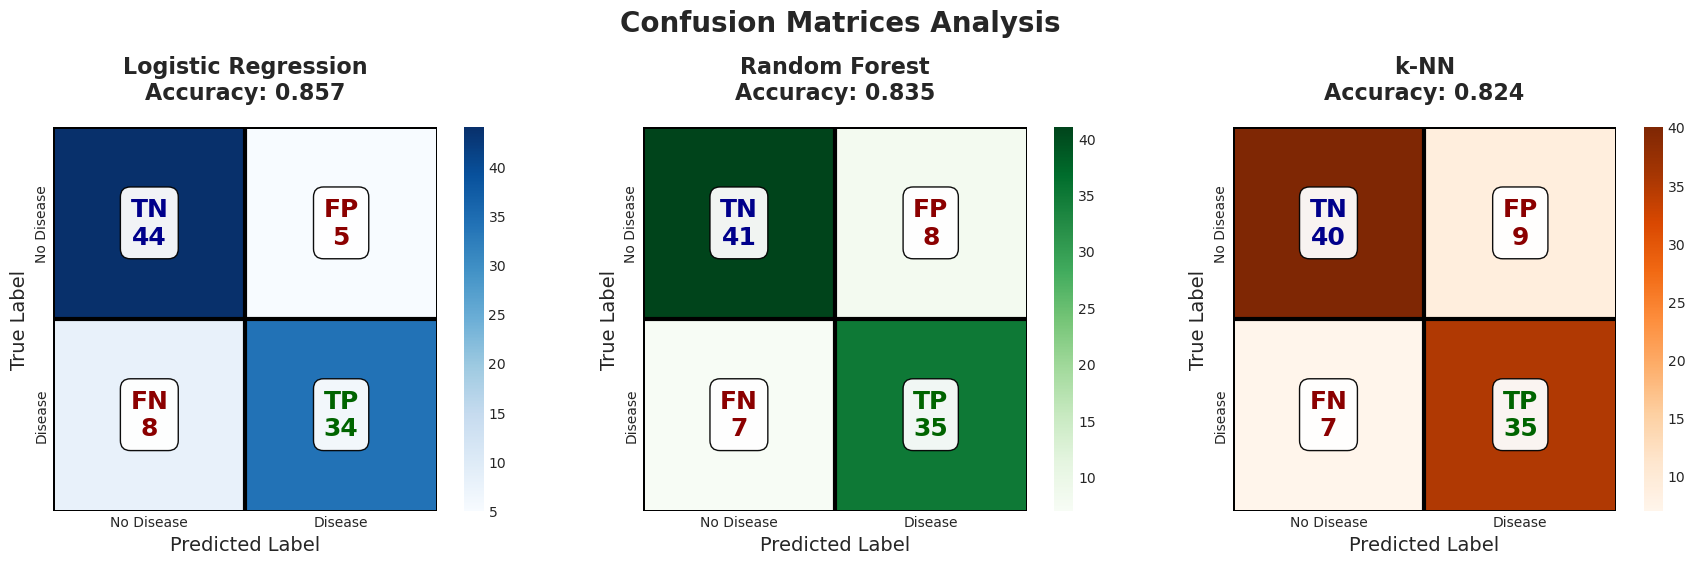


✓ Saved: confusion_matrices_final.png


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

print("\n" + "="*70)
print("GENERATING CONFUSION MATRICES")
print("="*70)

# Calculate confusion matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Create figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.subplots_adjust(wspace=0.3)

model_names = ['Logistic Regression', 'Random Forest', 'k-NN']
cms = [cm_lr, cm_rf, cm_knn]
cmaps = ['Blues', 'Greens', 'Oranges']

# Handle single subplot case
if not isinstance(axes, np.ndarray):
    axes = [axes]

for i, (ax, cm, cmap, name) in enumerate(zip(axes, cms, cmaps, model_names)):
    # Extract values safely
    if cm.shape == (2, 2):
        # Standard binary classification
        TN, FP, FN, TP = cm.ravel()
    else:
        # Handle other shapes
        print(f"{name}: Shape = {cm.shape} (not 2x2)")
        
        # Flatten the matrix
        flat = cm.flatten()
        
        # Try to get 4 values
        if len(flat) >= 4:
            TN, FP, FN, TP = flat[:4]
        elif len(flat) == 1:
            TN = flat[0]
            FP = FN = TP = 0
        else:
            # Pad with zeros if needed
            values = list(flat) + [0] * (4 - len(flat))
            TN, FP, FN, TP = values[:4]
    
    # Convert to integers
    TN, FP, FN, TP = int(TN), int(FP), int(FN), int(TP)
    
    # Create 2x2 display matrix
    display_cm = np.array([[TN, FP], [FN, TP]])
    
    # Create heatmap
    sns.heatmap(display_cm, annot=False, fmt='d', cmap=cmap, 
                cbar=True, square=True, ax=ax,
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'],
                linewidths=2, linecolor='black')
    
    # Add labels with white background
    font_props = {'ha': 'center', 'va': 'center', 'fontsize': 18, 'fontweight': 'bold'}
    bbox_props = dict(boxstyle="round,pad=0.4", facecolor='white', edgecolor='black', alpha=0.95)
    
    ax.text(0.5, 0.5, f"TN\n{TN}", color='darkblue', bbox=bbox_props, **font_props)
    ax.text(1.5, 0.5, f"FP\n{FP}", color='darkred', bbox=bbox_props, **font_props)
    ax.text(0.5, 1.5, f"FN\n{FN}", color='darkred', bbox=bbox_props, **font_props)
    ax.text(1.5, 1.5, f"TP\n{TP}", color='darkgreen', bbox=bbox_props, **font_props)
    
    # Add grid lines
    ax.axvline(x=1, color='black', linewidth=3)
    ax.axhline(y=1, color='black', linewidth=3)
    
    # Calculate metrics
    total = TP + TN + FP + FN
    accuracy = (TP + TN) / total if total > 0 else 0
    
    # Set title
    ax.set_title(f'{name}\nAccuracy: {accuracy:.3f}', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Predicted Label', fontsize=14)
    ax.set_ylabel('True Label', fontsize=14)
    
    # Print values
    print(f"\n{name}:")
    print(f"[[{TN:3d} {FP:3d}]")
    print(f" [{FN:3d} {TP:3d}]]")
    print(f"Accuracy: {accuracy:.3f}")

plt.suptitle('Confusion Matrices Analysis', fontsize=20, fontweight='bold', y=1.05)
plt.savefig('confusion_matrices_final.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.tight_layout()
plt.show()
print("\n✓ Saved: confusion_matrices_final.png")

## 6.2 ROC Curves

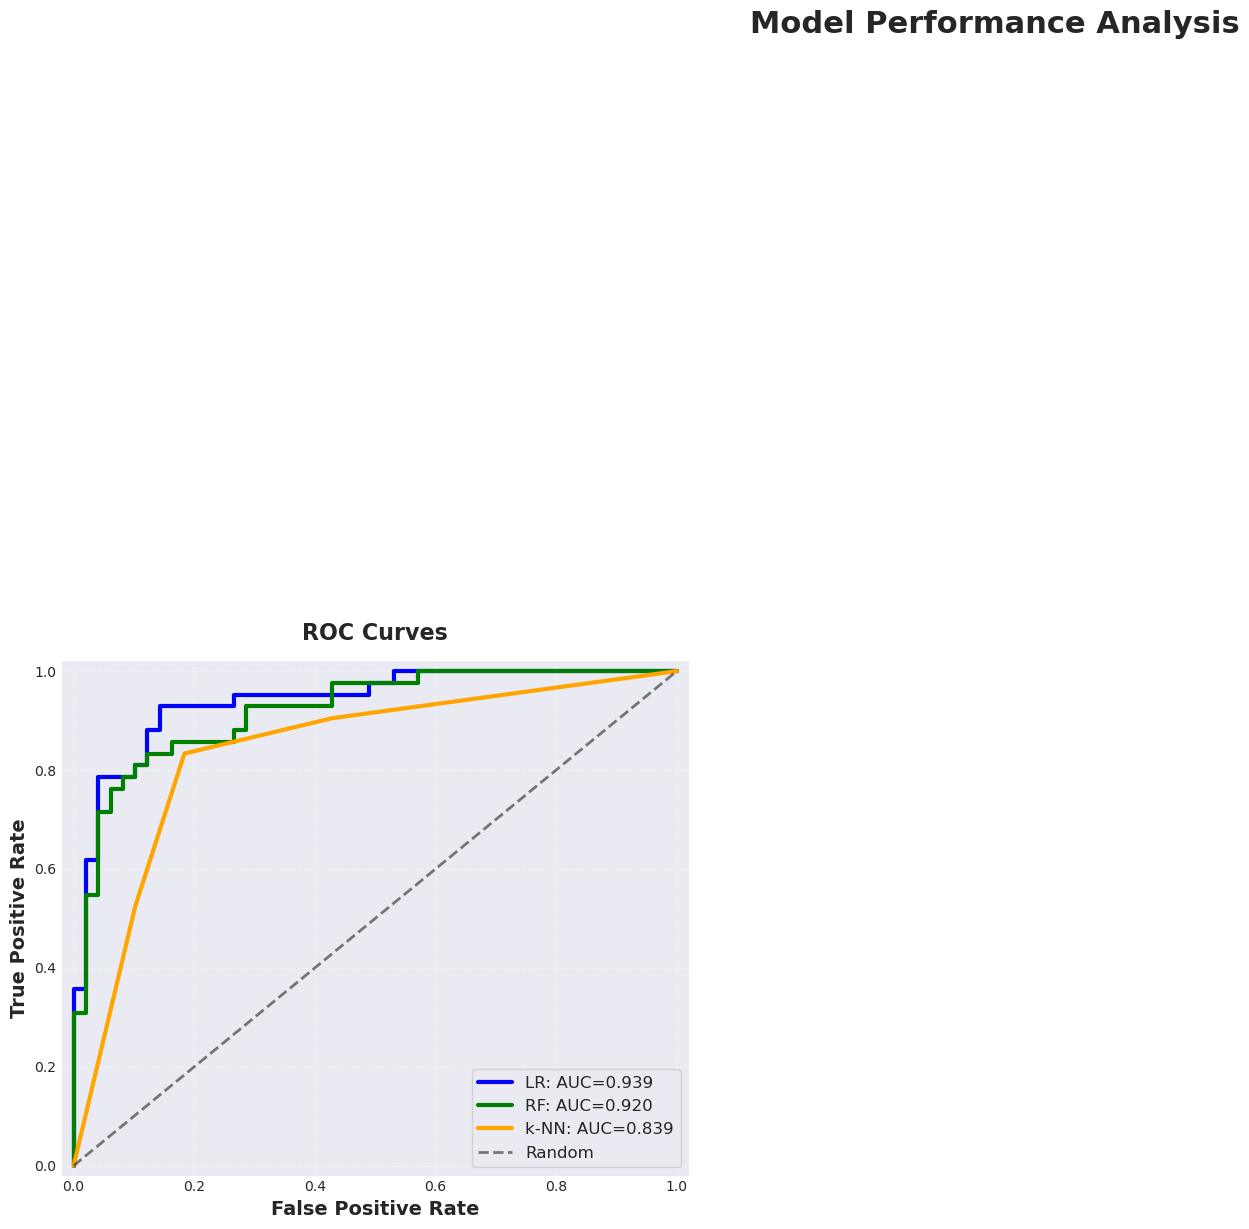

✓ Complete analysis figure saved as 'Complete_Analysis_Figure.png'


In [22]:
# Create a complete figure with better spacing
fig = plt.figure(figsize=(20, 12))
fig.suptitle('Model Performance Analysis', fontsize=22, fontweight='bold', y=1.02)

# Add more spacing between subplots
fig.subplots_adjust(wspace=0.4, hspace=0.4)

# ==================== ROC CURVES ====================
ax_roc = plt.subplot(2, 3, 4)  # Bottom left

try:
    # Calculate and plot ROC curves
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
    fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
    
    auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
    auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
    auc_knn = roc_auc_score(y_test, y_pred_proba_knn)
    
    # Plot with better styling
    plt.plot(fpr_lr, tpr_lr, 'b-', linewidth=3, label=f'LR: AUC={auc_lr:.3f}')
    plt.plot(fpr_rf, tpr_rf, 'g-', linewidth=3, label=f'RF: AUC={auc_rf:.3f}')
    plt.plot(fpr_knn, tpr_knn, 'orange', linewidth=3, label=f'k-NN: AUC={auc_knn:.3f}')
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2, alpha=0.5, label='Random')
    
    plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
    plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
    plt.title('ROC Curves', fontsize=16, fontweight='bold', pad=15)
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.legend(fontsize=12, loc='lower right', frameon=True, fancybox=True)
    
    # Set nice axis limits
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    
except Exception as e:
    plt.text(0.5, 0.5, 'ROC Unavailable\n(Check data balance)', 
             ha='center', va='center', fontsize=14,
             transform=ax_roc.transAxes,
             bbox=dict(boxstyle='round', facecolor='lightgray'))
    plt.title('ROC Curves (Data Issue)', fontsize=16, color='red')


# Save the complete figure
plt.savefig('Complete_ROC_Analysis_Figure.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

plt.tight_layout()
plt.show()

print("✓ Complete analysis figure saved as 'Complete_Analysis_Figure.png'")

## 6.3 Feature Importance (Random Forest)

Generating Feature Importance Plot...


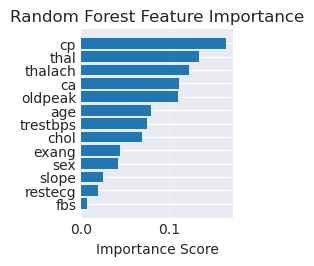

In [25]:
print("Generating Feature Importance Plot...")

ax5 = plt.subplot(2, 3, 5)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_best.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=True)

plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance Score')
plt.title('Random Forest Feature Importance')
plt.grid(True, alpha=0.3, axis='x')
plt.savefig('RF_Feature_Importance.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.tight_layout()
plt.show()


## 6.4 Performance Metrics Bar Chart

Generating Performance Comparison Chart...

Visualizations saved as 'classification_results.png'


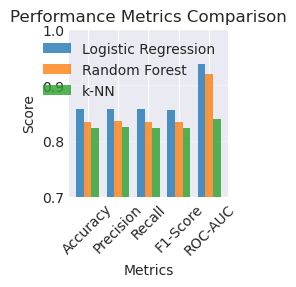

In [26]:
print("Generating Performance Comparison Chart...")

ax6 = plt.subplot(2, 3, 6)
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x_pos = np.arange(len(metrics_to_plot))
width = 0.25

for i, model_name in enumerate(['Logistic Regression', 'Random Forest', 'k-NN']):
    model_metrics = results_df[results_df['Model'] == model_name]
    values = [model_metrics[metric].values[0] for metric in metrics_to_plot]
    plt.bar(x_pos + i*width - width, values, width, 
            label=model_name, 
            alpha=0.8)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics Comparison')
plt.xticks(x_pos, metrics_to_plot, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0.7, 1.0)

plt.tight_layout()
plt.savefig('classification_results.png', dpi=300, bbox_inches='tight')
print("\nVisualizations saved as 'classification_results.png'")
plt.show()

 ## 6.5 Learning Curves

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2]:
def plot_learning_curve(model, X, y, ax, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model,
        X,
        y,
        cv=5,
        scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10),
        shuffle=True,
        random_state=42
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean  = np.mean(test_scores, axis=1)

    ax.plot(train_sizes, train_mean, marker='o', label='Training Accuracy')
    ax.plot(train_sizes, test_mean, marker='s', label='Validation Accuracy')

    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel("Training Samples")
    ax.set_ylabel("Accuracy")
    ax.grid(True, alpha=0.4)
    ax.legend()


Downloaded dataset from UCI repository


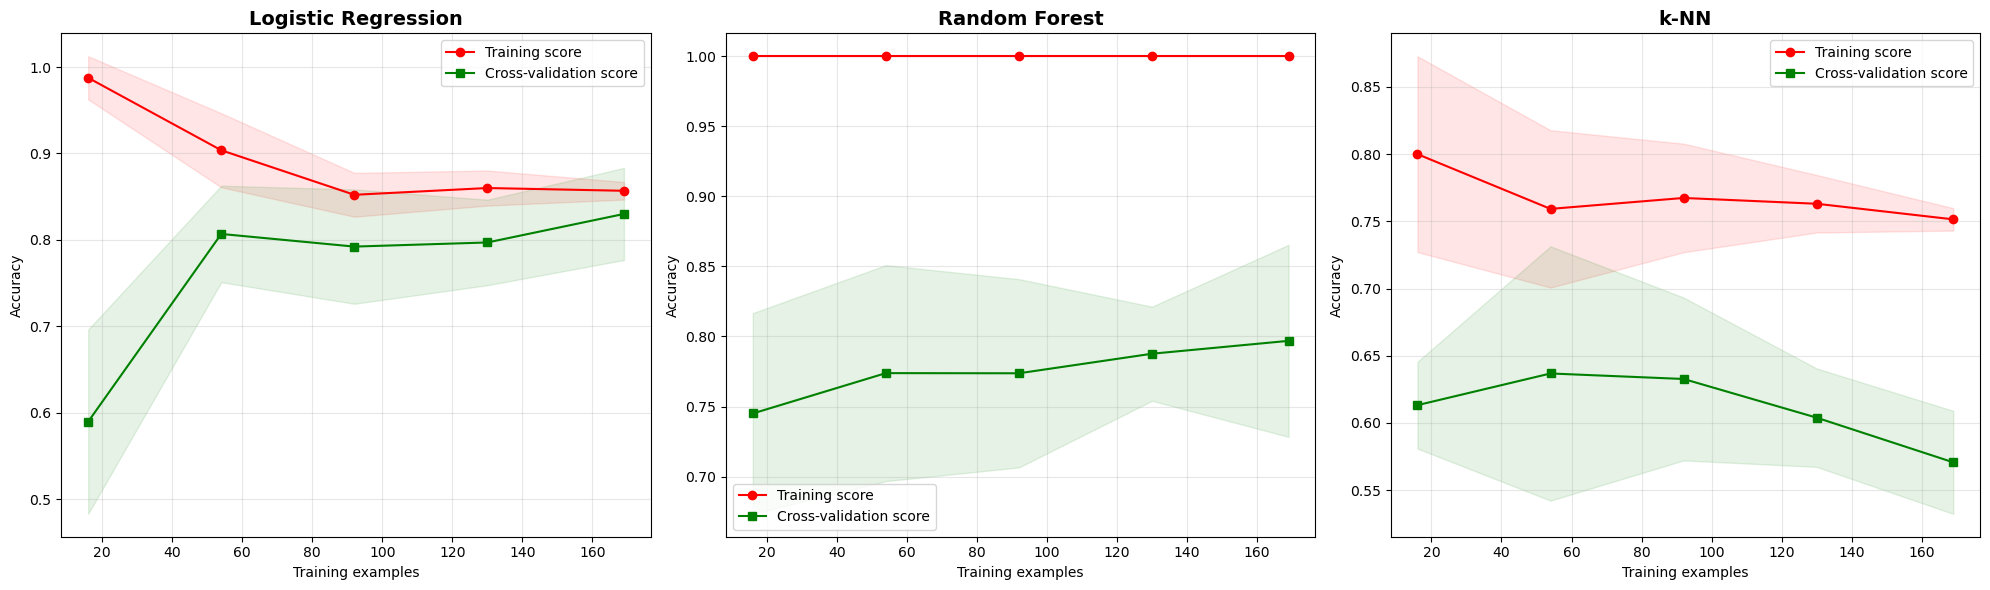

In [5]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, learning_curve

# Column names
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
df = pd.read_csv(url, header=None, names=column_names)
print("Downloaded dataset from UCI repository")

# Replace "?" with NaN
df.replace('?', np.nan, inplace=True)

# Convert all columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing values in 'ca' and 'thal' with median
for col in ['ca', 'thal']:
    df[col].fillna(df[col].median(), inplace=True)

# Convert target to binary: 0 = no disease, 1 = disease
df['target'] = df['target'].apply(lambda x: 0 if x == 0 else 1)

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Function to plot learning curve
def plot_learning_curve(estimator, X, y, ax, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5),
        shuffle=True, random_state=42
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    test_mean  = np.mean(test_scores, axis=1)
    test_std   = np.std(test_scores, axis=1)
    
    ax.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    
    ax.plot(train_sizes, test_mean, 's-', color="g", label="Cross-validation score")
    ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Accuracy")
    ax.grid(True, alpha=0.3)
    ax.legend(loc="best")

# Plot learning curves for LR, RF, k-NN
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

plot_learning_curve(LogisticRegression(max_iter=2000, random_state=42), X_train, y_train, axes[0], "Logistic Regression")
plot_learning_curve(RandomForestClassifier(n_estimators=300, random_state=42), X_train, y_train, axes[1], "Random Forest")
plot_learning_curve(KNeighborsClassifier(n_neighbors=5), X_train, y_train, axes[2], "k-NN")

plt.tight_layout()
plt.savefig("learning_curves.png", dpi=300)
plt.show()
